In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data=np.linspace(-1,1,100)
y_data=2*x_data+1.0+np.random.randn(*x_data.shape)*0.4
x=tf.placeholder('float',name='x')
y=tf.placeholder('float',name='y')

w=tf.Variable(1.0,name='w0')
b=tf.Variable(0.0,name='b0')

In [3]:
def model(x,w,b):
    return tf.multiply(x,w)+b
pred=model(x,w,b)

2023-03-09 19:21:24.740833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 19:21:24.743472: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


w= 1.9822522
b= 1.0420525


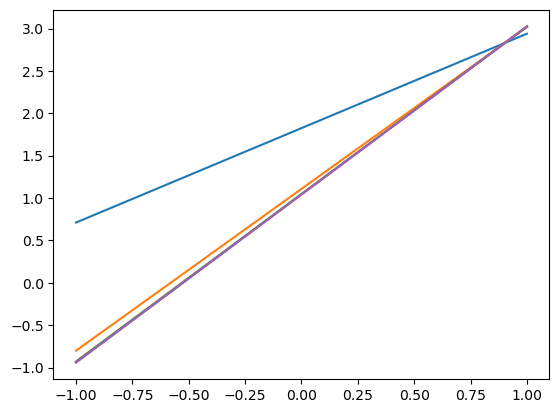

In [4]:
learning_rate=0.05
loss_function=tf.reduce_mean(tf.square(y-pred))
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

train_epochs=5
for epoch in range(train_epochs):
    for xs,ys in zip(x_data,y_data):
        _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot(x_data,w0temp*x_data+b0temp)

print('w=',sess.run(w))
print('b=',sess.run(b))

In [5]:
x_test=3.21
predict=sess.run(pred,feed_dict={x:x_test})
print('predice value:%f'%predict)
target=2*x_test+1.0
print('goal value:%f'%target)

predice value:7.405083
goal value:7.420000
